In [1]:
import geopandas as gpd

from shapely.geometry import Polygon

# 1.Bounding Box Filter(按矩形提取):

### 仅加载与边界框相交的数据。

<AxesSubplot:>

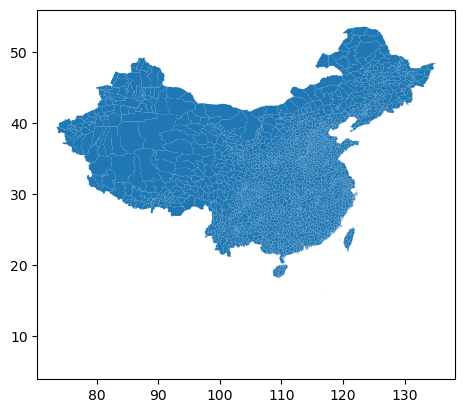

In [2]:
gdf = gpd.read_file("./datasets/china/china_counties.shp")
gdf.plot()

### 示例1：

In [3]:
# 确定边界框的范围
bbox = (115,30,120,35)

In [4]:
gdf_bbox = gpd.read_file("./datasets/china/china_counties.shp",bbox=bbox)

<AxesSubplot:>

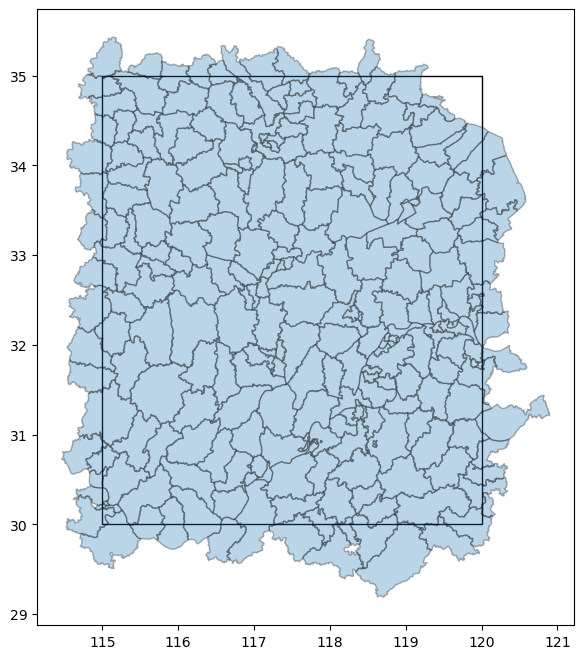

In [5]:
ax = gpd.GeoSeries(Polygon([(115,30) , (115,35) , (120,35) , (120,30)])).plot(facecolor="none" , figsize=(8,8))
gdf_bbox.plot(ax=ax , alpha=0.3 , edgecolor="k")

### 示例2：

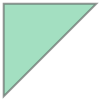

In [6]:
# 将边界框设置为三角形
bbox = Polygon([(115,30) , (115,35) , (120,35)])
bbox

In [7]:
gdf_bbox = gpd.read_file("./datasets/china/china_counties.shp",bbox=bbox)

<AxesSubplot:>

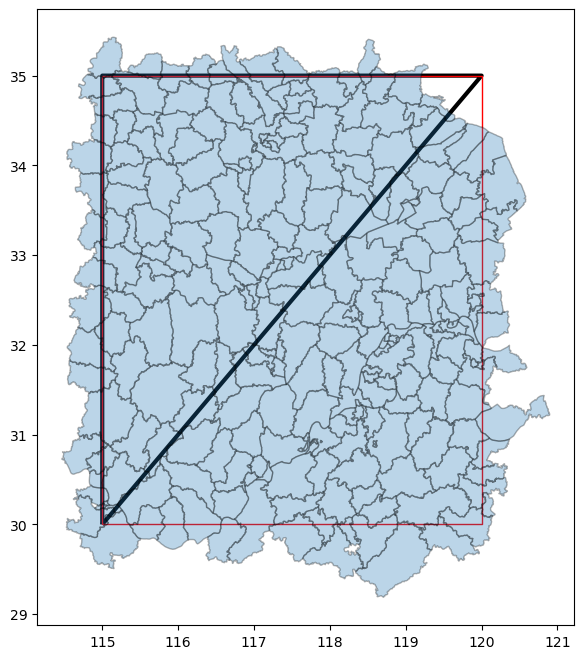

In [8]:
ax = gpd.GeoSeries(bbox).plot(facecolor="none" ,linewidth=3 , figsize=(8,8))

gpd.GeoSeries(Polygon([(115,30) , (115,35) , (120,35) , (120,30)])).plot(ax=ax , edgecolor="red" , facecolor="none",linewidth=1)

gdf_bbox.plot(ax=ax , alpha=0.3 , edgecolor="k")

# 2.Geometry Filter(按掩膜提取)：

In [9]:
gdf = gpd.read_file("./datasets/china/china_counties.shp")
gdf.head()

,OBJECTID,PAC,NAME,Shape_Leng,Shape_Area,geometry
0,1,110101,东城区,0.415102,0.004417,"POLYGON ((116.40581 39.96245, 116.40783 39.960..."
1,2,110102,西城区,0.394567,0.005304,"POLYGON ((116.38784 39.97167, 116.38789 39.970..."
2,3,110105,朝阳区,1.505849,0.049028,"MULTIPOLYGON (((116.48030 40.07965, 116.48970 ..."
3,4,110106,丰台区,1.346741,0.032195,"POLYGON ((116.31743 39.88626, 116.31527 39.880..."
4,5,110107,石景山区,0.515045,0.008883,"POLYGON ((116.14949 39.98832, 116.15085 39.986..."


<AxesSubplot:>

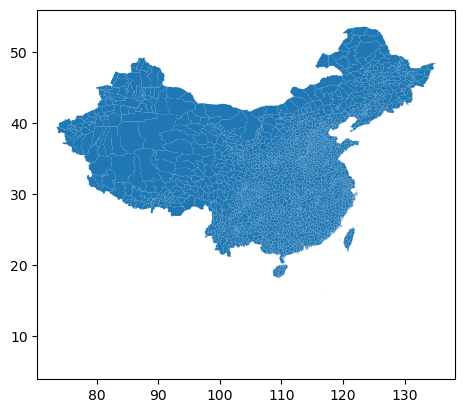

In [10]:
gdf.plot()

### 示例1：

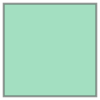

In [11]:
# 掩膜范围
mask = Polygon([(115,30) , (115,35) , (120,35) , (120,30)])
mask

In [12]:
# 按掩膜提取特定范围数据
gdf_mask = gpd.read_file("./datasets/china/china_counties.shp" , mask=mask)

<AxesSubplot:>

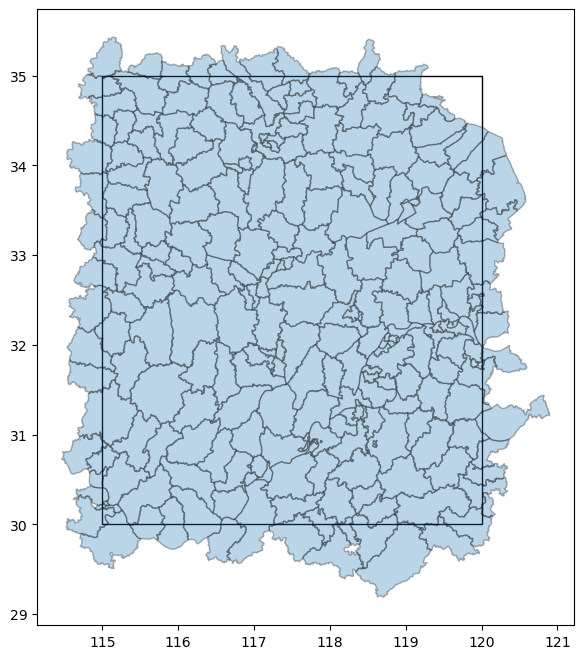

In [13]:
ax = gpd.GeoSeries(mask).plot(facecolor="none" , figsize=(8,8))
gdf_mask.plot(ax=ax , alpha=0.3 , edgecolor="k")

### 示例2：

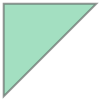

In [14]:
# 掩膜范围
mask = Polygon([(115,30) , (115,35) , (120,35)])
mask

In [15]:
# 按掩膜提取特定范围数据
gdf_mask = gpd.read_file("./datasets/china/china_counties.shp" , mask=mask)

<AxesSubplot:>

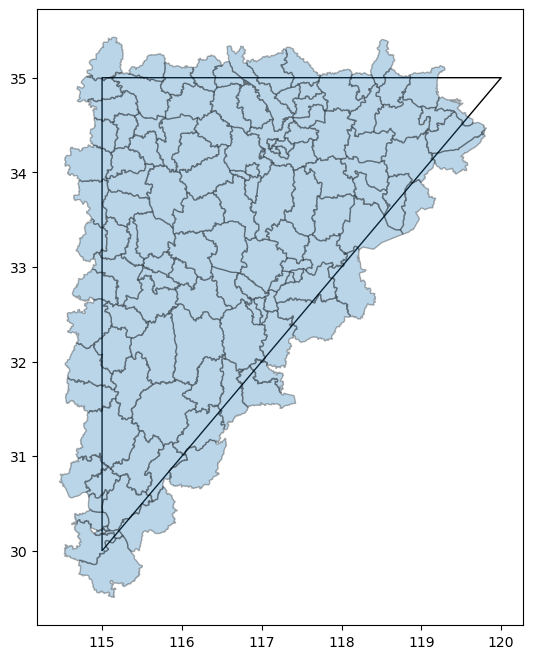

In [16]:
ax = gpd.GeoSeries(mask).plot(facecolor="none" , figsize=(8,8))
gdf_mask.plot(ax=ax , alpha=0.3 , edgecolor="k")

### 示例3：

In [17]:
gdf_1 = gpd.read_file("./datasets/naturalearth_lowres/naturalearth_lowres.shp")
gdf_2 = gpd.read_file("./datasets/naturalearth_cities/naturalearth_cities.shp")

gdf_1.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

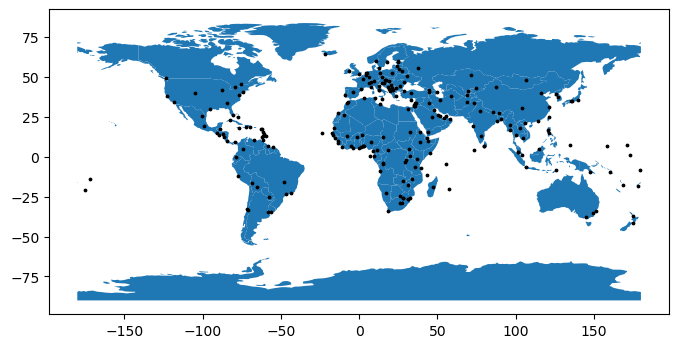

In [18]:
ax = gdf_1.plot(figsize=(8,8))
gdf_2.plot(ax=ax ,color="k" , markersize=3)

<AxesSubplot:>

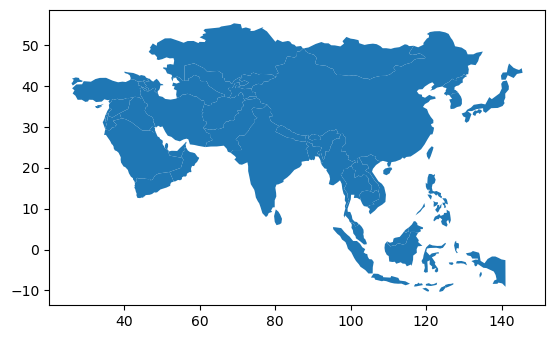

In [19]:
# 将亚洲范围作为掩膜
mask = gdf_1[gdf_1["continent"] == "Asia"]
mask.plot()

<AxesSubplot:>

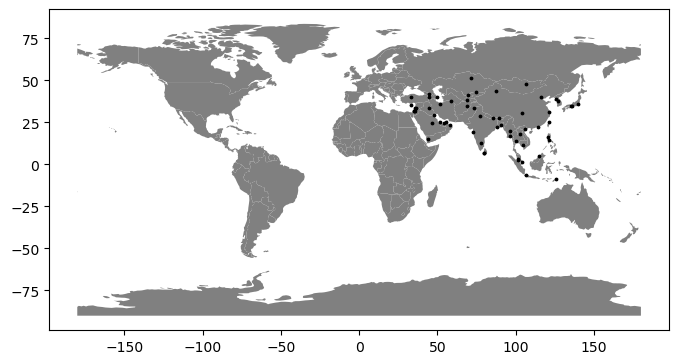

In [20]:
gdf_mask = gpd.read_file("./datasets/naturalearth_cities/naturalearth_cities.shp",mask=mask)

ax = gdf_1.plot(figsize=(8,8) , facecolor="gray")
gdf_mask.plot(ax=ax ,color="k" , markersize=3)

# 3.Row Filter（行过滤）：

### 使用整数（对于前 n 行）或切片对象过滤从文件加载的行。

### 示例1：

In [21]:
gdf = gpd.read_file("./datasets/china/china_counties.shp")
gdf

,OBJECTID,PAC,NAME,Shape_Leng,Shape_Area,geometry
0,1,110101,东城区,0.415102,0.004417,"POLYGON ((116.40581 39.96245, 116.40783 39.960..."
1,2,110102,西城区,0.394567,0.005304,"POLYGON ((116.38784 39.97167, 116.38789 39.970..."
2,3,110105,朝阳区,1.505849,0.049028,"MULTIPOLYGON (((116.48030 40.07965, 116.48970 ..."
3,4,110106,丰台区,1.346741,0.032195,"POLYGON ((116.31743 39.88626, 116.31527 39.880..."
4,5,110107,石景山区,0.515045,0.008883,"POLYGON ((116.14949 39.98832, 116.15085 39.986..."
...,...,...,...,...,...,...
2900,2901,710210,前镇区,0.215416,0.001689,"POLYGON ((120.32254 22.61569, 120.32342 22.613..."
2901,2902,710211,旗津区,0.170950,0.000441,"POLYGON ((120.27170 22.61347, 120.27464 22.611..."
2902,2903,710212,小港区,0.314396,0.004117,"POLYGON ((120.36048 22.50767, 120.35556 22.510..."
2903,2904,810000,香港特别行政区,6.491279,0.097800,"MULTIPOLYGON (((113.91455 22.16283, 113.91516 ..."


In [22]:
# 加载前n行数据
gdf_row = gpd.read_file("./datasets/china/china_counties.shp" , rows=10)
gdf_row

,OBJECTID,PAC,NAME,Shape_Leng,Shape_Area,geometry
0,1,110101,东城区,0.415102,0.004417,"POLYGON ((116.40581 39.96245, 116.40783 39.960..."
1,2,110102,西城区,0.394567,0.005304,"POLYGON ((116.38784 39.97167, 116.38789 39.970..."
2,3,110105,朝阳区,1.505849,0.049028,"MULTIPOLYGON (((116.48030 40.07965, 116.48970 ..."
3,4,110106,丰台区,1.346741,0.032195,"POLYGON ((116.31743 39.88626, 116.31527 39.880..."
4,5,110107,石景山区,0.515045,0.008883,"POLYGON ((116.14949 39.98832, 116.15085 39.986..."
5,6,110108,海淀区,1.301904,0.045254,"POLYGON ((116.20369 40.13931, 116.20469 40.139..."
6,7,110109,门头沟区,2.375043,0.152920,"POLYGON ((115.80080 40.15195, 115.80129 40.151..."
7,8,110111,房山区,2.921817,0.209861,"POLYGON ((116.04840 39.84461, 116.05077 39.841..."
8,9,110112,通州区,2.085777,0.095114,"POLYGON ((116.62105 40.02026, 116.63179 40.020..."
9,10,110113,顺义区,1.938245,0.106663,"POLYGON ((116.86578 40.28082, 116.87218 40.263..."


<AxesSubplot:>

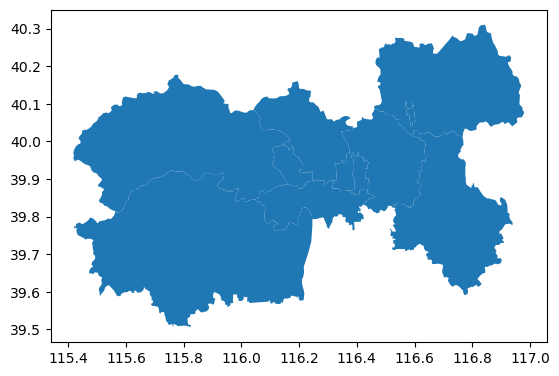

In [23]:
gdf_row.plot()

### 示例2:

In [24]:
# python内置函数slice()实现切片对象
rows = slice(5,15)

In [25]:
gdf_row = gpd.read_file("./datasets/china/china_counties.shp" , rows=rows)
gdf_row

,OBJECTID,PAC,NAME,Shape_Leng,Shape_Area,geometry
0,6,110108,海淀区,1.301904,0.045254,"POLYGON ((116.20369 40.13931, 116.20469 40.139..."
1,7,110109,门头沟区,2.375043,0.152920,"POLYGON ((115.80080 40.15195, 115.80129 40.151..."
2,8,110111,房山区,2.921817,0.209861,"POLYGON ((116.04840 39.84461, 116.05077 39.841..."
3,9,110112,通州区,2.085777,0.095114,"POLYGON ((116.62105 40.02026, 116.63179 40.020..."
4,10,110113,顺义区,1.938245,0.106663,"POLYGON ((116.86578 40.28082, 116.87218 40.263..."
5,11,110114,昌平区,2.256964,0.142149,"POLYGON ((116.28879 40.38977, 116.29643 40.386..."
6,12,110115,大兴区,2.344216,0.108500,"POLYGON ((116.52907 39.82348, 116.53390 39.822..."
7,13,110116,怀柔区,3.665480,0.225633,"POLYGON ((116.67527 41.04010, 116.67616 41.040..."
8,14,110117,平谷区,1.679369,0.100230,"POLYGON ((117.19809 40.37174, 117.19822 40.371..."
9,15,110118,密云区,3.097144,0.236353,"POLYGON ((116.89004 40.78530, 116.88973 40.782..."


# 4.Field/Column Filters(字段/列过滤):

### 从文件中加载列的子集：

In [26]:
gdf = gpd.read_file("./datasets/naturalearth_lowres/naturalearth_lowres.shp")
gdf

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


### Requires Fiona 1.9+

In [27]:
gdf_filter = gpd.read_file("./datasets/naturalearth_lowres/naturalearth_lowres.shp" , include_fields=["pop_est" , "continent" , "name"])
gdf_filter

,pop_est,continent,name,geometry
0,889953.0,Oceania,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...
172,6944975.0,Europe,Serbia,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


### Requires Fiona 1.8+

In [28]:
# gdf_filter = gpd.read_file("./datasets/naturalearth_lowres/naturalearth_lowres.shp" , 
#                            ignore_fields=["pop_est" , "continent" , "name"])
# gdf_filter

### 不加载活动几何“geometry”列，结果将返回pandas.DataFrame类型

In [29]:
gdf = gpd.read_file("./datasets/naturalearth_lowres/naturalearth_lowres.shp" , 
                    ignore_geometry=True)
gdf

,pop_est,continent,name,iso_a3,gdp_md_est
0,889953.0,Oceania,Fiji,FJI,5496
1,58005463.0,Africa,Tanzania,TZA,63177
2,603253.0,Africa,W. Sahara,ESH,907
3,37589262.0,North America,Canada,CAN,1736425
4,328239523.0,North America,United States of America,USA,21433226
...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475
173,622137.0,Europe,Montenegro,MNE,5542
174,1794248.0,Europe,Kosovo,-99,7926
175,1394973.0,North America,Trinidad and Tobago,TTO,24269


## 5.SQL WHERE Filter

### 使用 SQL WHERE 语句加载数据子集

### Requires Fiona 1.9+ or the pyogrio engine.

In [30]:
gdf = gpd.read_file("./datasets/naturalearth_lowres/naturalearth_lowres.shp")
gdf

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [31]:
gdf_filter = gpd.read_file("./datasets/naturalearth_lowres/naturalearth_lowres.shp",
                           where="continent='Africa'")
gdf_filter

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
1,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
2,86790567.0,Africa,Dem. Rep. Congo,COD,50400,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
3,10192317.3,Africa,Somalia,SOM,4719,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829..."
4,52573973.0,Africa,Kenya,KEN,95503,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."
5,42813238.0,Africa,Sudan,SDN,30513,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ..."
6,15946876.0,Africa,Chad,TCD,11314,"POLYGON ((23.83766 19.58047, 23.88689 15.61084..."
7,58558270.0,Africa,South Africa,ZAF,351431,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
8,2125268.0,Africa,Lesotho,LSO,2376,"POLYGON ((28.97826 -28.95560, 29.32517 -29.257..."
9,14645468.0,Africa,Zimbabwe,ZWE,21440,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


<AxesSubplot:>

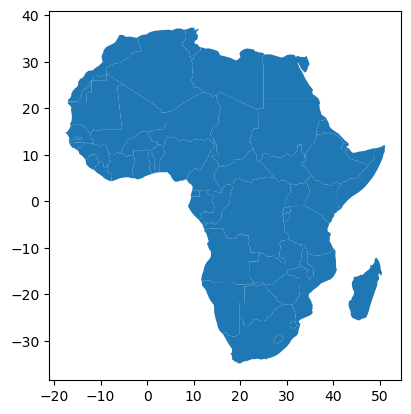

In [32]:
gdf_filter.plot()